<a href="https://colab.research.google.com/github/mmccleeseschool/Intro-to-machine-Learning/blob/main/McCleese_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


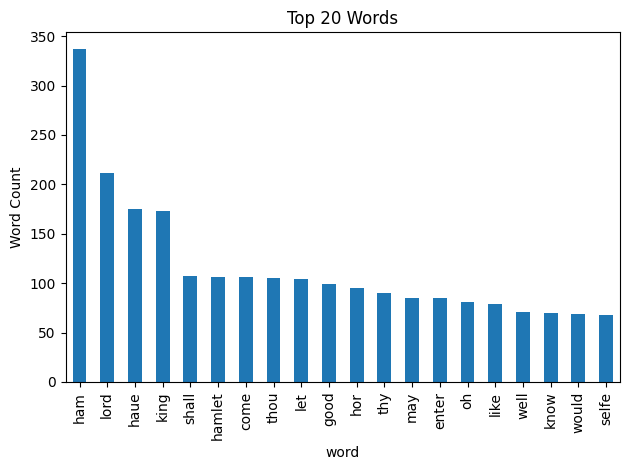

<ipython-input-15-1cc48f1726b6>:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


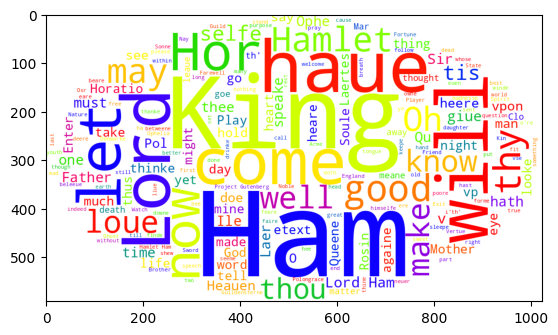

In [15]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from pathlib import Path

!pip install requests
import requests

target_url = "https://www.gutenberg.org/files/2265/2265.txt"
response = requests.get(target_url)
data = response.text

from textblob import TextBlob
blob = TextBlob(data)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]

from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

top20 = sorted_items[0:20]

import pandas as pd
df = pd.DataFrame(top20, columns=['word', 'count'])



import matplotlib.pyplot as plt
axes = df.plot.bar(x='word', y='count', legend = False)
axes.set_title('Top 20 Words')
axes.set_ylabel('Word Count')
plt.gcf().tight_layout()

plt.show()


import imageio.v2
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)


from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=1000,
                      colormap='prism', mask=mask_image, background_color='white')

wordcloud = wordcloud.generate(data)

plt.imshow(wordcloud)



